In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('human.csv', encoding='CP949')
df.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [3]:
mdf = df.copy()

In [4]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   아이디     32561 non-null  object
 1   나이      32561 non-null  int64 
 2   노동 계급   30725 non-null  object
 3   fnlwgt  32561 non-null  int64 
 4   학력      32561 non-null  object
 5   교육 수    32561 non-null  int64 
 6   혼인 상태   32561 non-null  object
 7   직업      30718 non-null  object
 8   관계      32561 non-null  object
 9   인종      32561 non-null  object
 10  성별      32561 non-null  object
 11  자본 이득   32561 non-null  int64 
 12  자본 손실   32561 non-null  int64 
 13  주당 시간   32561 non-null  int64 
 14  모국      31978 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
mdf.isnull().sum()

아이디          0
나이           0
노동 계급     1836
fnlwgt       0
학력           0
교육 수         0
혼인 상태        0
직업        1843
관계           0
인종           0
성별           0
자본 이득        0
자본 손실        0
주당 시간        0
모국         583
dtype: int64

## 남녀 성비 그래프

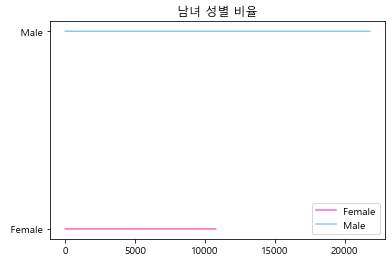

In [11]:
import csv
import matplotlib.pyplot as plt

f = open('human.csv')
data = csv.reader(f)
next(data)
Male = [] # 최고 기온 값을 저장할 리스트 high 생성
Female = [] # 최저 기온 값을 저장할 리스트 low 생성

for row in data :
    if row[10] != '':
        sex = row[10]
        if sex == ' Male':
            Male.append(sex)
        if sex == ' Female':    
            Female.append(sex)
            
plt.rc('font', family = 'Malgun Gothic') # 맑은 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.title('남녀 성별 비율') # 제목 설정
plt.plot(Female, 'hotpink', label = 'Female') # high 리스트에 저장된 값을 hotpink 색으로 그리고 레이블을 표시

plt.plot(Male, 'skyblue', label = 'Male') # low 리스트에 저장된 값을 skyblue 색으로 그리고 레이블을 표시
plt.legend() # 범례 표시
plt.show() # 그래프 나타내기

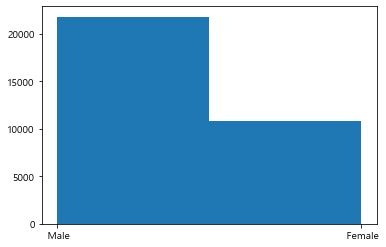

In [15]:
import csv
import matplotlib.pyplot as plt

f = open('human.csv')
data = csv.reader(f)
next(data)
gender = []

for row in data :
    if row[10] != '':
        sex = row[10]
        if sex == ' Male':
            gender.append(sex)
        if sex == ' Female':    
            gender.append(sex)

# plt.figure(dpi = 300)
plt.hist(gender, bins = 2)
plt.show()

## 나이 그래프

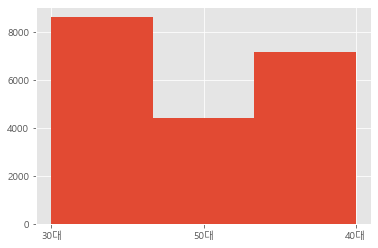

In [34]:
import csv
import matplotlib.pyplot as plt

f = open('human.csv')
data = csv.reader(f)
next(data)
d = []

for row in data :
    if row[1] != '':
        if int(row[1]) >= 30 and int(row[1]) < 40:
            d.append('30대')
            
        if int(row[1]) >= 40 and int(row[1]) < 50:
            d.append('40대')
            
        if int(row[1]) >=50 and int(row[1]) < 60:
            d.append('50대')
            
# plt.figure(dpi = 300)
plt.hist(d, bins = 3)
plt.show()

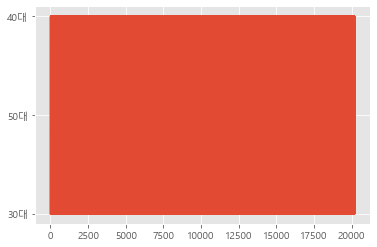

In [29]:
# 이 방법은 잘 어울리지 않는 듯 하다.
plt.style.use('ggplot')
plt.plot(d)
plt.show()

## 나이를 파이차트로 나타내기

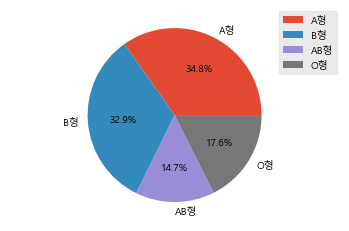

In [30]:
# 비율 범례 표시하기
# autopct : auto percent 라는 의미, 어떤 형태로 값을 표시할 지 작성하면 각 항목의 
#           비율을 자동으로 계산해서 표시.
# %.1f%% : 소수점 아래 첫번째 소수점까지 표현.
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
size = [2441, 2312, 1031, 1233]
label = ['A형','B형','AB형', 'O형']
plt.axis('equal')
plt.pie(size, labels = label, autopct = '%.1f%%')   # 비율 및 범례 추가
plt.legend()
plt.show()

<ipython-input-38-6f48f0b76eaa>:31: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(age, labels = ['30대','40대', '50대'], autopct ='%.1f%%', colors = color, startangle =90)


ValueError: 'label' must be of length 'x'

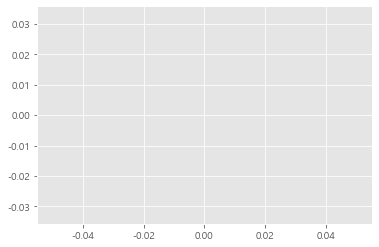

In [38]:
# 잘 되지 않는다. 방법을 강구 해 봐야 할 듯 하다.
import csv
import re

f = open('human.csv')
data = csv.reader(f)
next(data)

age30 = 0
age40 = 0
age50 = 0

for row in data :
    if row[1] != '':
        if int(row[1]) >= 30 and int(row[1]) < 40:
            age30 += int(row[1])
            
        if int(row[1]) >= 40 and int(row[1]) < 50:
            age40 += int(row[1])
            
        if int(row[1]) >=50 and int(row[1]) < 60:
            age50 += int(row[1])
            
size.append(age30)
size.append(age40)
size.append(age50)

s = []

import matplotlib.pyplot as plt
plt.rc('font', family ='Malgun Gothic')
color = ['crimson', 'darkcyan', 'yellow']
plt.axis('equal')
plt.pie(age, labels = ['30대','40대', '50대'], autopct ='%.1f%%', colors = color, startangle =90)
plt.title('나이 비율')
plt.show()

In [6]:
# Istrip()
mdf['혼인 상태'] = mdf['혼인 상태'].apply(lambda x: x.lstrip())

In [7]:
con = ['노동 계급', '직업', '모국']
from sklearn.impute import SimpleImputer
imputer_con = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_con.fit(mdf[con])
# imputer_com의 내장함수인 transform으로 train의 con 부분 컬럼을 변환하여 주었다.
x = imputer_con.transform(mdf[con])
# 데이터프레임 형태로 con의 컬럼을 가진 값들을 df1[con]에 넣어줌
mdf[con] = pd.DataFrame(x, columns=mdf[con].columns, index=mdf.index)
# df1[con]에 x값을 넣음
mdf[con] = x

In [8]:
# df1의 결축치 검사
mdf.isnull().sum()

아이디       0
나이        0
노동 계급     0
fnlwgt    0
학력        0
교육 수      0
혼인 상태     0
직업        0
관계        0
인종        0
성별        0
자본 이득     0
자본 손실     0
주당 시간     0
모국        0
dtype: int64

In [9]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   아이디     32561 non-null  object
 1   나이      32561 non-null  int64 
 2   노동 계급   32561 non-null  object
 3   fnlwgt  32561 non-null  int64 
 4   학력      32561 non-null  object
 5   교육 수    32561 non-null  int64 
 6   혼인 상태   32561 non-null  object
 7   직업      32561 non-null  object
 8   관계      32561 non-null  object
 9   인종      32561 non-null  object
 10  성별      32561 non-null  object
 11  자본 이득   32561 non-null  int64 
 12  자본 손실   32561 non-null  int64 
 13  주당 시간   32561 non-null  int64 
 14  모국      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
obj = ['노동 계급', '학력', '혼인 상태', '직업', '관계', '인종', '성별', '모국']
mdf[obj] = mdf[obj].apply(lambda x: x.astype('category').cat.codes)
mdf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국
0,H20001,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,H20002,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,H20003,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,H20004,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,H20005,28,3,338409,9,13,2,9,5,2,0,0,0,40,4


In [11]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   아이디     32561 non-null  object
 1   나이      32561 non-null  int64 
 2   노동 계급   32561 non-null  int8  
 3   fnlwgt  32561 non-null  int64 
 4   학력      32561 non-null  int8  
 5   교육 수    32561 non-null  int64 
 6   혼인 상태   32561 non-null  int8  
 7   직업      32561 non-null  int8  
 8   관계      32561 non-null  int8  
 9   인종      32561 non-null  int8  
 10  성별      32561 non-null  int8  
 11  자본 이득   32561 non-null  int64 
 12  자본 손실   32561 non-null  int64 
 13  주당 시간   32561 non-null  int64 
 14  모국      32561 non-null  int8  
dtypes: int64(6), int8(8), object(1)
memory usage: 2.0+ MB


In [12]:
mdf['성별 예측1'] = mdf['관계'] == 0
# mdf['성별 예측2'] = mdf['관계'] != 5
# mdf['성별 예측3'] = mdf['교육 수'] < 9
# mdf['성별 예측4'] = mdf['노동 계급'] >= 4
# mdf['성별 예측5'] = mdf['학력'] < 9
# mdf['성별 예측6'] = mdf['혼인 상태'] != 4
# mdf['성별 예측7'] = mdf['관계'] != 3

mdf.reset_index()

,index,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,성별 예측1
0,0,H20001,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,False
1,1,H20002,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,True
2,2,H20003,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,False
3,3,H20004,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,True
4,4,H20005,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,H52557,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,False
32557,32557,H52558,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,True
32558,32558,H52559,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,False
32559,32559,H52560,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,False


In [13]:
obj2 = ['성별 예측1']
mdf[obj2] = mdf[obj2].apply(lambda x: x.astype('category').cat.codes)
mdf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,성별 예측1
0,H20001,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,H20002,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,1
2,H20003,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,H20004,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,1
4,H20005,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


## 머신러닝으로 확률 계산

In [14]:
from sklearn.model_selection import train_test_split  
X = mdf.drop(['아이디','성별'], axis=1) 
Y = mdf['성별']                    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [15]:
display(X_train.shape, X_test.shape)

(24420, 14)

(8141, 14)

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [17]:
pred_tree = tree.predict(X_test)
pred_tree

array([0, 0, 1, ..., 1, 1, 0], dtype=int8)

In [18]:
from sklearn.svm import SVC
svm = SVC(random_state = 0)
svm.fit(X_train, y_train)

SVC(random_state=0)

In [19]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

<font color = "darkgreen">
1. Decision Trees

In [21]:
display(tree.score(X_train, y_train))
display(tree.score(X_test, y_test))

0.8332104832104832

0.8250829136469722

<font color = "darkgreen">
2. SVM

In [22]:
display(svm.score(X_train, y_train))
display(svm.score(X_test, y_test))

0.6696150696150697

0.6680997420464316

<font color = "darkgreen">
3. Neural Networks

In [23]:
display(mlp.score(X_train, y_train))
display(mlp.score(X_test, y_test))

0.3918099918099918

0.39122957867583835

<font color = "darkgreen">
4. KNN

In [24]:
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)
knn.score(X_test, y_test)

0.6881218523522908

<font color = "darkgreen">
5. AdaBoost

In [25]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0)
ada.fit(X_train, y_train).score(X_test, y_test)

0.8412971379437415

In [26]:
best_model = ada   # Change this code if the best model is not decision tree.
best_model.score(X_test, y_test)

0.8412971379437415

In [27]:
# 랜덤 모형의 성능과 개발 모형의 성능을 비교한다.

from sklearn.dummy import DummyClassifier
print(y_test.value_counts())
DummyClassifier(strategy='most_frequent').fit(X_train, y_train).score(X_test, y_test)

1    5440
0    2701
Name: 성별, dtype: int64


0.6682225770789829

In [28]:
import xgboost as xgb
from xgboost import plot_importance
#import pan
import numpy as np

In [29]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [30]:
dtrain

In [163]:
params = {'max_depth':4,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':1
         }
num_rounds = 500

In [164]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기
wlist = [(dtrain, 'train'),(dtest, 'eval')]
# 하이퍼 파라미터와 early stoppinig 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[13:39:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.64241	eval-logloss:0.64288
[1]	train-logloss:0.60089	eval-logloss:0.60160
[2]	train-logloss:0.56626	eval-logloss:0.56699
[3]	train-logloss:0.53701	eval-logloss:0.53802
[4]	train-logloss:0.51216	eval-logloss:0.51338
[5]	train-logloss:0.49066	eval-logloss:0.49224
[6]	train-logloss:0.47204	eval-logloss:0.47357
[7]	train-logloss:0.45576	eval-logloss:0.45744
[8]	train-logloss:0.44152	eval-logloss:0.44321
[9]	train-logloss:0.42897	eval-logloss:0.43088
[10]	train-logloss:0.41725	eval-logloss:0.41918
[11]	train-logloss:0.40736	eval-logloss:0.40931
[12]	train-logloss:0.39854	eval-logloss:0

[162]	train-logloss:0.27362	eval-logloss:0.29633
[163]	train-logloss:0.27355	eval-logloss:0.29629
[164]	train-logloss:0.27321	eval-logloss:0.29617
[165]	train-logloss:0.27313	eval-logloss:0.29620
[166]	train-logloss:0.27299	eval-logloss:0.29624
[167]	train-logloss:0.27290	eval-logloss:0.29622
[168]	train-logloss:0.27284	eval-logloss:0.29622
[169]	train-logloss:0.27260	eval-logloss:0.29609
[170]	train-logloss:0.27258	eval-logloss:0.29609
[171]	train-logloss:0.27239	eval-logloss:0.29607
[172]	train-logloss:0.27230	eval-logloss:0.29600
[173]	train-logloss:0.27216	eval-logloss:0.29606
[174]	train-logloss:0.27207	eval-logloss:0.29606
[175]	train-logloss:0.27196	eval-logloss:0.29608
[176]	train-logloss:0.27166	eval-logloss:0.29607
[177]	train-logloss:0.27163	eval-logloss:0.29611
[178]	train-logloss:0.27158	eval-logloss:0.29612
[179]	train-logloss:0.27148	eval-logloss:0.29617
[180]	train-logloss:0.27120	eval-logloss:0.29612
[181]	train-logloss:0.27098	eval-logloss:0.29619
[182]	train-logloss:

[330]	train-logloss:0.25459	eval-logloss:0.29555
[331]	train-logloss:0.25444	eval-logloss:0.29545
[332]	train-logloss:0.25438	eval-logloss:0.29547
[333]	train-logloss:0.25430	eval-logloss:0.29543
[334]	train-logloss:0.25422	eval-logloss:0.29539
[335]	train-logloss:0.25413	eval-logloss:0.29538
[336]	train-logloss:0.25405	eval-logloss:0.29536
[337]	train-logloss:0.25395	eval-logloss:0.29542
[338]	train-logloss:0.25384	eval-logloss:0.29546
[339]	train-logloss:0.25383	eval-logloss:0.29546
[340]	train-logloss:0.25376	eval-logloss:0.29550
[341]	train-logloss:0.25371	eval-logloss:0.29551
[342]	train-logloss:0.25368	eval-logloss:0.29551
[343]	train-logloss:0.25361	eval-logloss:0.29558
[344]	train-logloss:0.25352	eval-logloss:0.29562
[345]	train-logloss:0.25344	eval-logloss:0.29565
[346]	train-logloss:0.25339	eval-logloss:0.29564
[347]	train-logloss:0.25338	eval-logloss:0.29564
[348]	train-logloss:0.25336	eval-logloss:0.29564
[349]	train-logloss:0.25334	eval-logloss:0.29564
[350]	train-logloss:

[498]	train-logloss:0.23806	eval-logloss:0.29605
[499]	train-logloss:0.23796	eval-logloss:0.29601


In [165]:
new = pd.read_csv('human_new.csv', encoding='cp949')
new.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국
0,H00001,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States
1,H00002,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States
2,H00003,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States
3,H00004,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States
4,H00005,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States


In [166]:
obj = ['노동 계급', '학력', '혼인 상태', '직업', '관계', '인종', '모국']
new[obj] = new[obj].apply(lambda x: x.astype('category').cat.codes)
new.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국
0,H00001,25,3,226802,1,7,4,6,3,2,0,0,40,37
1,H00002,38,3,89814,11,9,2,4,0,4,0,0,50,37
2,H00003,28,1,336951,7,12,2,10,0,4,0,0,40,37
3,H00004,44,3,160323,15,10,2,6,0,2,7688,0,40,37
4,H00005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37


In [167]:
new['성별 예측1'] = new['관계'] == 0
# new['성별 예측2'] = new['관계'] != 5
# new['성별 예측3'] = new['교육 수'] < 9
# new['성별 예측4'] = new['노동 계급'] >= 4
# new['성별 예측5'] = new['학력'] < 9
# new['성별 예측6'] = new['혼인 상태'] != 4
# new['성별 예측7'] = new['관계'] != 3

new.reset_index()

,index,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,성별 예측1
0,0,H00001,25,3,226802,1,7,4,6,3,2,0,0,40,37,False
1,1,H00002,38,3,89814,11,9,2,4,0,4,0,0,50,37,True
2,2,H00003,28,1,336951,7,12,2,10,0,4,0,0,40,37,True
3,3,H00004,44,3,160323,15,10,2,6,0,2,7688,0,40,37,True
4,4,H00005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,16276,H16277,20,-1,216672,15,10,4,-1,3,4,0,0,30,37,False
16277,16277,H16278,25,3,61956,9,13,4,3,3,4,4650,0,45,37,False
16278,16278,H16279,33,3,157216,12,14,4,11,1,4,0,0,40,37,False
16279,16279,H16280,68,-1,150250,12,14,2,-1,0,4,0,1510,30,37,True


In [168]:
obj2 = ['성별 예측1']
new[obj2] = new[obj2].apply(lambda x: x.astype('category').cat.codes)
new.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,성별 예측1
0,H00001,25,3,226802,1,7,4,6,3,2,0,0,40,37,0
1,H00002,38,3,89814,11,9,2,4,0,4,0,0,50,37,1
2,H00003,28,1,336951,7,12,2,10,0,4,0,0,40,37,1
3,H00004,44,3,160323,15,10,2,6,0,2,7688,0,40,37,1
4,H00005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37,0


In [169]:
dtest_ndf = xgb.DMatrix(data=new.iloc[:, 1:])

In [170]:
new['pred'] = xgb_model.predict(dtest_ndf)
new.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,성별 예측1,pred
0,H00001,25,3,226802,1,7,4,6,3,2,0,0,40,37,0,0.783471
1,H00002,38,3,89814,11,9,2,4,0,4,0,0,50,37,1,0.999950
2,H00003,28,1,336951,7,12,2,10,0,4,0,0,40,37,1,0.999827
3,H00004,44,3,160323,15,10,2,6,0,2,7688,0,40,37,1,0.999926
4,H00005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37,0,0.408747


In [171]:
ndf = new.copy()

In [172]:
str = ['아이디','pred']
ndf[str].head()

,아이디,pred
0,H00001,0.783471
1,H00002,0.999950
2,H00003,0.999827
3,H00004,0.999926
4,H00005,0.408747


In [173]:
#movie_rename = movie.rename(index={0:'아바타'}, columns={'color':'색깔','director_name':'감독이름'})
ndf_rename = ndf.rename(columns={'아이디':'ID', 'pred':'SEX'})
ndf_rename.head()

,ID,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,성별 예측1,SEX
0,H00001,25,3,226802,1,7,4,6,3,2,0,0,40,37,0,0.783471
1,H00002,38,3,89814,11,9,2,4,0,4,0,0,50,37,1,0.999950
2,H00003,28,1,336951,7,12,2,10,0,4,0,0,40,37,1,0.999827
3,H00004,44,3,160323,15,10,2,6,0,2,7688,0,40,37,1,0.999926
4,H00005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37,0,0.408747


In [174]:
str = ['ID','SEX']
ndf_rename[str].head()

,ID,SEX
0,H00001,0.783471
1,H00002,0.999950
2,H00003,0.999827
3,H00004,0.999926
4,H00005,0.408747


In [175]:
ndf_rename[str].to_csv('submission_human.csv', encoding='cp949', index=False)

In [176]:
ndf_rename.shape

(16281, 16)

In [45]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0) 

### Building Pipelines

In [47]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [48]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

In [49]:
pipe.fit(X_train, y_train).score(X_test, y_test)

0.972027972027972

### Using Pipelines in Grid-searches

In [50]:
from sklearn.model_selection import GridSearchCV # 최적의 파라미터 검색

In [51]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [52]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(
    grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.98
Test set score: 0.97
Best parameters: {'svm__C': 1, 'svm__gamma': 1}


### *make_pipeline*을 통한 편리한 파이프라인 생성

In [53]:
from sklearn.pipeline import make_pipeline

In [54]:
# standard syntax
pipe_long = Pipeline([("scaler", MinMaxScaler()), 
                      ("svm", SVC(C=100))])
#pipe_long = Pipeline([('pca', PCA(n_components=3))), 
 #                     (('univ_select', SelectKBest(k=10))])

In [55]:
# abbreviated syntax(약칭구문 - 이름을 넣지 않고 파이프 라인 만들기)
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100)) 

In [56]:
print("Pipeline steps:\n{}".format(pipe_short.steps))

Pipeline steps:
[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), 
                     StandardScaler())
print("Pipeline steps:\n{}".format(pipe.steps))

Pipeline steps:
[('standardscaler-1', StandardScaler()), ('pca', PCA(n_components=2)), ('standardscaler-2', StandardScaler())]


In [58]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA # 차원축소 
from sklearn.feature_selection import SelectKBest # 성능이 좋은 변수만 사용하는 전처리기

In [59]:
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('univ_select', SelectKBest(k=10)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('features', feature_union))
estimators.append(('scaler', MinMaxScaler()))
estimators.append(("svm", SVC()))
pipe = Pipeline(estimators)

In [60]:
pipe.fit(X_train, y_train).score(X_test, y_test)

0.958041958041958

In [61]:
# Do grid search
param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[9, 10, 11],
                  svm__C=[0.1, 1, 10],
                  svm__gamma=[0.1, 1, 10])
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)
print(grid_search.fit(X_train, y_train).score(X_test, y_test))
print(grid_search.best_estimator_)

0.951048951048951
Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=1)),
                                                ('univ_select',
                                                 SelectKBest())])),
                ('scaler', MinMaxScaler()), ('svm', SVC(C=10, gamma=10))])


In [62]:
import pandas as pd
import numpy as np

train = pd.read_csv('human.csv', encoding='CP949')
train.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [63]:
train.isnull().sum()

아이디          0
나이           0
노동 계급     1836
fnlwgt       0
학력           0
교육 수         0
혼인 상태        0
직업        1843
관계           0
인종           0
성별           0
자본 이득        0
자본 손실        0
주당 시간        0
모국         583
dtype: int64

In [64]:
tr = train.drop(['아이디', '성별'], axis=1)
tr.head()

,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba


In [65]:
X_train, X_test, y_train, y_test = train_test_split(tr, train.성별, random_state=0)

In [66]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

In [67]:
from sklearn.base import BaseEstimator, TransformerMixin
# BaseEstimator를 상속하면 get_params 및 set_params를 무료로 얻을 수 있습니다
# TransformerMixin를 상속하면 fit 및 transform 메서드를 작성하고 fit_transform을 무료로 얻을 수 있습니다
# (참고) https://towardsdatascience.com/custom-transformers-and-ml-data-pipelines-with-python-20ea2a7adb65

# 1)번 Custom Transformer
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.feature_names].values

In [68]:
# 2)번 Custom Transformer
class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
    def fit(self, X_cat, y=None):
        return self
    def transform(self, X_cat):
        X_cat_df = pd.DataFrame(X_cat, columns=range(X_cat.shape[1]))
        X_onehot_df = pd.get_dummies(X_cat_df, columns=X_cat_df.columns)
        return X_onehot_df.values

In [69]:
# feature를 수치형과 범주형으로 구분
con = ['나이', 'fnlwgt', '교육 수', '자본 이득', '자본 손실', '주당 시간'] # 수치형 변수들
cat = ['노동 계급', '학력', '혼인 상태', '직업', '관계', '인종', '모국']  # 범주형 변수들

In [70]:
# 인덱스 위치
con_idx = [train.columns.get_loc(c) for c in train.columns if c in con]
cat_idx = [train.columns.get_loc(c) for c in train.columns if c in cat]

In [71]:
print(con_idx, cat_idx)

[1, 3, 5, 11, 12, 13] [2, 4, 6, 7, 8, 9, 14]


In [72]:
# 수치형 feature에 대한 전처리
con_pipeline = Pipeline([
    ('selector', DataFrameSelector(con)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

# 범주형 feature에 대한 전처리
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat)),
    ('encoder', CustomLabelBinarizer()),
])

# 전처리된 수치형과 범주형 feature를 결합
full_pipeline = FeatureUnion([
    ('con_pipeline', con_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [73]:
print("con_pipeline steps:\n{}".format(con_pipeline.steps))

con_pipeline steps:
[('selector', DataFrameSelector(feature_names=['나이', 'fnlwgt', '교육 수', '자본 이득', '자본 손실',
                                 '주당 시간'])), ('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]


In [74]:
print("cat_pipeline steps:\n{}".format(cat_pipeline.steps))

cat_pipeline steps:
[('selector', DataFrameSelector(feature_names=['노동 계급', '학력', '혼인 상태', '직업', '관계', '인종',
                                 '모국'])), ('encoder', CustomLabelBinarizer())]


In [75]:
full_pipeline

FeatureUnion(transformer_list=[('con_pipeline',
                                Pipeline(steps=[('selector',
                                                 DataFrameSelector(feature_names=['나이',
                                                                                  'fnlwgt',
                                                                                  '교육 '
                                                                                  '수',
                                                                                  '자본 '
                                                                                  '이득',
                                                                                  '자본 '
                                                                                  '손실',
                                                                                  '주당 '
                                                                                  '시간'])),
     

In [76]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

In [77]:
X_train_prepared

array([[ 1.49894077, -1.2079589 , -0.80338299, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.38045121, -0.08366135,  1.53114709, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.2501343 , -0.77396423,  1.53114709, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.14559057, -1.36469155, -0.0252063 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.47051192,  0.24865765,  2.30932378, ...,  1.        ,
         0.        ,  0.        ],
       [-0.99867216, -0.02508527, -0.0252063 , ...,  1.        ,
         0.        ,  0.        ]])

In [78]:
X_test_prepared

array([[-0.85175375, -0.11784965, -0.0252063 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.85175375,  0.25451337,  1.14205874, ...,  1.        ,
         0.        ,  0.        ],
       [-0.99867216,  0.63084957,  0.7529704 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.04370251,  0.37517518, -0.41429464, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.79277758,  0.22248194,  1.14205874, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.61743032, -0.03375059, -0.0252063 , ...,  0.        ,
         0.        ,  0.        ]])